In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\Kartikay Raheja\Desktop\PY files\ckd.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


bp	-	blood pressure
sg	-	specific gravity 
al	- albumin 
su	-	sugar 
rbc	-	red blood cells 
pc	-	pus cell 
pcc	-	pus cell clumps 
ba	-	bacteria 
bgr	-	blood glucose random 
bu	-	blood urea 
sc	-	serum creatinine 
sod	-	sodium 
pot	-	potassium 
hemo	-	hemoglobin 
pcv	-	packed cell volume 
wc	-	white blood cell count 
rc	-	red blood cell count 
htn	-	hypertension 
dm	-	diabetes mellitus 
cad	-	coronary artery disease 
appet	-	appetite 
pe	-	pedal edema 
ane	-	anemia 
class	-	class

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      391 non-null float64
bp       388 non-null float64
sg       353 non-null float64
al       354 non-null float64
su       351 non-null float64
rbc      248 non-null object
pc       335 non-null object
pcc      396 non-null object
ba       396 non-null object
bgr      356 non-null float64
bu       381 non-null float64
sc       383 non-null float64
sod      313 non-null float64
pot      312 non-null float64
hemo     348 non-null float64
pcv      329 non-null float64
wbcc     294 non-null float64
rbcc     269 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(14), object(11)
memory usage: 78.2+ KB


## dropping columns with more than 10% missing data

In [7]:
null_data=df.isnull().mean()
b_column=null_data[null_data>0.1]

In [8]:
df1=df.drop(columns=b_column.index,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
age      391 non-null float64
bp       388 non-null float64
pcc      396 non-null object
ba       396 non-null object
bu       381 non-null float64
sc       383 non-null float64
htn      398 non-null object
dm       398 non-null object
cad      398 non-null object
appet    399 non-null object
pe       399 non-null object
ane      399 non-null object
class    400 non-null object
dtypes: float64(4), object(9)
memory usage: 40.7+ KB


## Visualising rest of the missing data

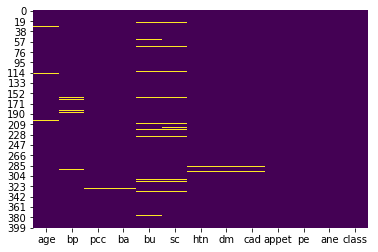

In [9]:
sns.heatmap(df1.isnull(),cbar=False,cmap='viridis')

In [10]:
df_numerical_ckd=df1[df1['class']=='ckd'].select_dtypes(include='float64')
df_numerical_nckd=df1[df1['class']=='notckd'].select_dtypes(include='float64')

## Imputing missing values

In [11]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

In [12]:
imputer=Imputer()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
df_numerical_ckd=imputer.fit_transform(df_numerical_ckd)
df_numerical_nckd=imputer.fit_transform(df_numerical_nckd)

In [14]:
df_numerical_ckd=pd.DataFrame(df_numerical_ckd,columns=df1.select_dtypes(include='float64').columns)
df_numerical_nckd=pd.DataFrame(df_numerical_nckd,columns=df1.select_dtypes(include='float64').columns)

In [15]:
df_numerical=pd.concat([df_numerical_ckd,df_numerical_nckd])

In [16]:
df_numerical.reset_index(inplace=True,drop=True)

In [17]:
df_categorical=df1.select_dtypes(include='object')
df_categorical.isnull().sum()

pcc      4
ba       4
htn      2
dm       2
cad      2
appet    1
pe       1
ane      1
class    0
dtype: int64

In [18]:
df_categorical[df_categorical.isnull().any(axis=1)]

,pcc,ba,htn,dm,cad,appet,pe,ane,class
288,notpresent,notpresent,NaN,NaN,NaN,good,no,no,notckd
290,NaN,NaN,no,no,no,good,no,no,notckd
294,notpresent,notpresent,no,no,no,NaN,NaN,NaN,notckd
297,notpresent,notpresent,NaN,NaN,NaN,good,no,no,notckd
300,NaN,NaN,no,no,no,good,no,no,notckd
316,NaN,NaN,no,no,no,good,no,no,notckd
328,NaN,NaN,no,no,no,good,no,no,notckd


In [19]:
df1_clean=df_categorical.join(df_numerical,how='outer')

In [20]:
df1_clean.dropna(inplace=True)

In [21]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 399
Data columns (total 13 columns):
pcc      393 non-null object
ba       393 non-null object
htn      393 non-null object
dm       393 non-null object
cad      393 non-null object
appet    393 non-null object
pe       393 non-null object
ane      393 non-null object
class    393 non-null object
age      393 non-null float64
bp       393 non-null float64
bu       393 non-null float64
sc       393 non-null float64
dtypes: float64(4), object(9)
memory usage: 43.0+ KB


## converting categorical columns using label encoder

In [22]:
l_encoder=LabelEncoder()
df1_clean['pcc']=l_encoder.fit_transform(df1_clean['pcc'])

In [23]:
df1_clean['ba']=l_encoder.fit_transform(df1_clean['ba'])
df1_clean['htn']=l_encoder.fit_transform(df1_clean['htn'])
df1_clean['dm']=l_encoder.fit_transform(df1_clean['dm'])
df1_clean['cad']=l_encoder.fit_transform(df1_clean['cad'])
df1_clean['appet']=l_encoder.fit_transform(df1_clean['appet'])
df1_clean['pe']=l_encoder.fit_transform(df1_clean['pe'])
df1_clean['ane']=l_encoder.fit_transform(df1_clean['ane'])
df1_clean['class']=l_encoder.fit_transform(df1_clean['class'])

In [104]:
class_corr=df1_clean.corrwith(df1_clean['class'])
class_corr.drop('class',inplace=True)

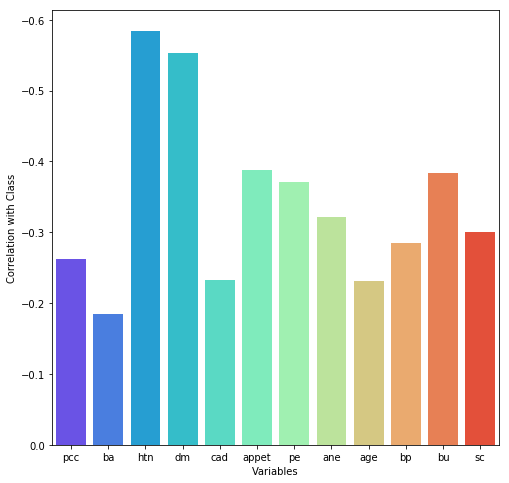

In [105]:
plt.figure(figsize=(8,8))
plt.ylim(0,-0.6138728516955119)
plt.ylabel('Correlation with Class')
plt.xlabel('Variables')
sns.barplot(class_corr.index,class_corr.values,palette='rainbow')

## Regression model

In [25]:
x=df1_clean.drop(labels='class',axis=1)
y=df1_clean['class']
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
pred=lr.predict(x_test)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        92
           1       0.85      1.00      0.92        46

   micro avg       0.94      0.94      0.94       138
   macro avg       0.93      0.96      0.94       138
weighted avg       0.95      0.94      0.94       138



In [33]:
print(confusion_matrix(y_test,pred))

[[84  8]
 [ 0 46]]


## Correlation heatmap

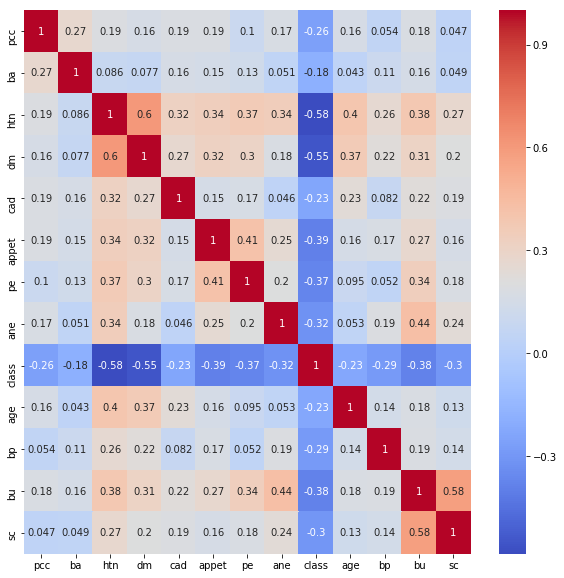

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df1_clean.corr(),annot=True,cmap='coolwarm')

## chronic kidney diseases according to age in hue with diabetes

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


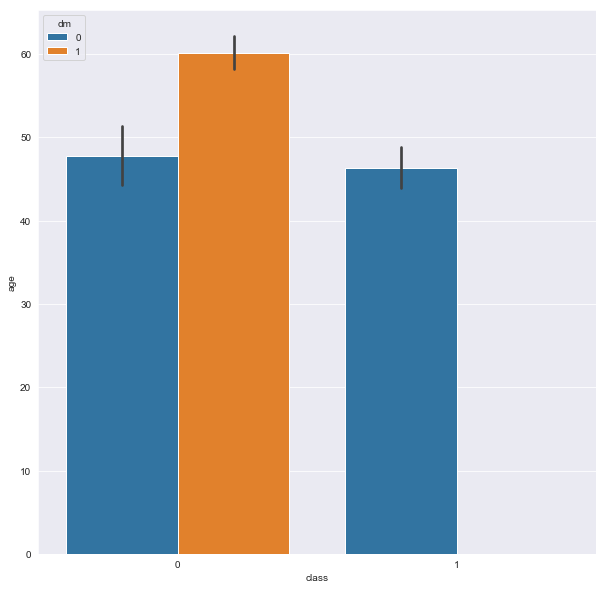

In [125]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.barplot(x='class',y='age',data=df1_clean,hue='dm')

## Boxplots for relationship between age/blood pressure and Ckd

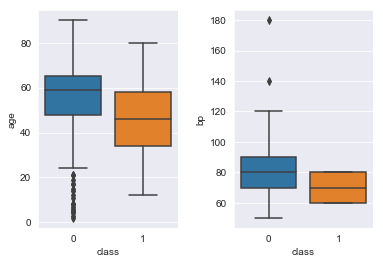

In [193]:

sns.set_style('darkgrid')
plt.yticks(np.arange(0,100,10))
plt.subplot(1,2,1)

plt.subplots_adjust(wspace=0.4,hspace=0.4)
sns.boxplot(x='class',y='age',data=df1_clean)
plt.subplot(1,2,2)
sns.boxplot(x='class',y='bp',data=df1_clean)

